0.3137610912863243 0.3329450352819549


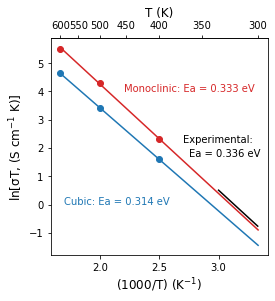

In [20]:
import numpy as np
import matplotlib.pyplot as plt

temp = [400, 500, 600]
cubic = [0.01235693349262754, 0.06083852322561093, 0.1713039453091316]
monoclinic = [0.025058220764162253, 0.14886670511742187, 0.41364485242908916]

rec_temp = []
ln_cubic = []
ln_monoclinic = []

for t, c, m in zip(temp, cubic, monoclinic):
    rec_temp.append(1000/t)
    ln_cubic.append(np.log(c*t))
    ln_monoclinic.append(np.log(m*t))
    
m1, c1 = np.polyfit(rec_temp, ln_cubic, 1)
m2, c2 = np.polyfit(rec_temp, ln_monoclinic, 1)

ea1 = -1000 * m1 * 1.380649 * 10**(-23) * 6.241509 * 10**18
ea2 = -1000 * m2 * 1.380649 * 10**(-23) * 6.241509 * 10**18

print(ea1, ea2)

fig, ax = plt.subplots() 

ax.scatter(rec_temp, ln_cubic, color='tab:blue')
ax.scatter(rec_temp, ln_monoclinic, color='tab:red')
ax.plot([1000/300, 1000/600], [m1*(1000/300)+c1, m1*(1000/600)+c1], ls='-', color='tab:blue')
ax.plot([1000/300, 1000/600], [m2*(1000/300)+c2, m2*(1000/600)+c2], ls='-', color='tab:red')

ax.plot([3.00, 3.33], [0.51, -0.76], color='black')

ax.text(1.7, 0, 'Cubic: Ea = 0.314 eV', color='tab:blue')
ax.text(2.2,4 , 'Monoclinic: Ea = 0.333 eV', color='tab:red')
ax.text(2.7, 2.2, 'Experimental:', color='black', size=10)
ax.text(2.75, 1.7, 'Ea = 0.336 eV', color='black', size=10)

ax.set_xlabel('(1000/T) (K$^\mathrm{-1}$)', size = 12)
ax.set_ylabel('ln[$\mathrm{\sigma}$T, (S cm$^\mathrm{-1}$ K)]', size = 12)

def invert(x):
    # 1/x with special treatment of x == 0
    x = np.array(x).astype(float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = np.inf
    x[~near_zero] = (1 / x[~near_zero])*1000
    return x

secax = ax.secondary_xaxis('top', functions=(invert, invert))
secax.set_xlabel('T (K)', size = 12)

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())

make_square_axes(plt.gca())

plt.savefig('lnconductivity.jpg', bbox_inches='tight', dpi=500)

In [10]:
m*(1000/300)+c

-6.064928318129551

In [12]:
np.exp(-6.064928318129551)

0.0023229245201366886